In [45]:
# Import Libraries
import os
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from uncertainties import ufloat
import warnings


# Add the src directory to the path to import snowpyt_mechparams
sys.path.append('../src')
from snowpilot_utils import parse_sample_pits


In [46]:
# Parse all snowpit files from the data folder
all_pits = parse_sample_pits('data')


Successfully parsed 50278 files
Failed to parse 0 files


In [47]:
# Collect Data
pit_info = []
temp_info = []

for pit in all_pits:
    pit_info_dict = {
        # User info
        'pit_id': pit.core_info.pit_id,
        # Weather
        'air_temp_value': pit.core_info.weather_conditions.air_temp_pres[0] if pit.core_info.weather_conditions.air_temp_pres else None,
        'air_temp_units': pit.core_info.weather_conditions.air_temp_pres[1] if pit.core_info.weather_conditions.air_temp_pres else None,
        'temp_profile_obs':len(pit.snow_profile.temp_profile)
    }
    pit_info.append(pit_info_dict)
    

    for obs in pit.snow_profile.temp_profile:
        temp_info_dict = {
            'pit_id': pit.core_info.pit_id,
            'depth_value': obs.depth[0] if obs.depth else None,
            'depth_units': obs.depth[1] if obs.depth else None,
            'temp_value': obs.snow_temp[0] if obs.snow_temp else None,
            'temp_units': obs.snow_temp[1] if obs.snow_temp else None
        }
        temp_info.append(temp_info_dict)


pit_df = pd.DataFrame(pit_info)
temp_df = pd.DataFrame(temp_info)

print(pit_df.head())
print(temp_df.head())


  pit_id  air_temp_value air_temp_units  temp_profile_obs
0  51686             NaN           None                 0
1   5847            -1.6           degC                 6
2   9544             NaN           None                18
3  30734           -13.0           degC                 7
4  43746             NaN           None                 0
  pit_id  depth_value depth_units  temp_value temp_units
0   5847          0.0          cm        -1.6       degC
1   5847         13.0          cm        -3.0       degC
2   5847         20.0          cm        -2.8       degC
3   5847         38.0          cm        -2.0       degC
4   5847         55.0          cm        -1.0       degC


In [48]:
# Confirm consistant units

print("Unique air temp units:")
print(pit_df['air_temp_units'].unique())

print("Unique temp depth units:")
print(temp_df['depth_units'].unique())

print("Unique temp units:")
print(temp_df['temp_units'].unique())


Unique air temp units:
[None 'degC']
Unique temp depth units:
['cm']
Unique temp units:
['degC']


In [49]:
# Summary stats for air temp

print(f"Number of pits: {len(all_pits)}")
pits_with_air_temp = pit_df[pit_df['air_temp_value'].notna()]
print(f"Number of pits with air temp observations: {len(pits_with_air_temp)}, {(len(pits_with_air_temp)/len(all_pits)*100):.2f}%")

# Number of pits with temp profiles
pits_with_temp_profile = pit_df[pit_df['temp_profile_obs'] > 0]
print(f"Number of pits with temp profiles: {len(pits_with_temp_profile)}, {(len(pits_with_temp_profile)/len(all_pits)*100):.2f}%")

# Number of temperature observations
print(f"Number of temperature profile observations: {len(temp_df)}")



Number of pits: 50278
Number of pits with air temp observations: 35747, 71.10%
Number of pits with temp profiles: 23138, 46.02%
Number of temperature profile observations: 213790


Air Temperature Summary Statistics
Number of observations: 35747
Mean: -2.30 °C
Median: -3.80 °C
Standard Deviation: 9.61 °C


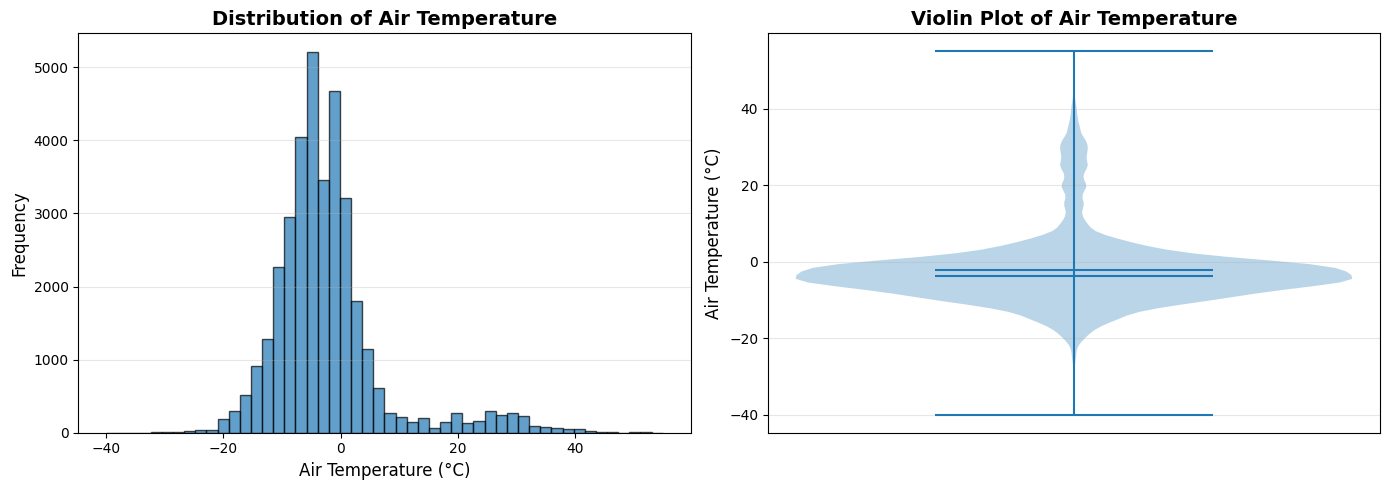

In [53]:
# Summary stats and visualization for air temp

# Summary statistics for air_temp_value
print("Air Temperature Summary Statistics")
print("=" * 50)
print(f"Number of observations: {len(pits_with_air_temp)}")
print(f"Mean: {pits_with_air_temp['air_temp_value'].mean():.2f} °C")
print(f"Median: {pits_with_air_temp['air_temp_value'].median():.2f} °C")
print(f"Standard Deviation: {pits_with_air_temp['air_temp_value'].std():.2f} °C")
print("=" * 50)
mean_air_temp = pits_with_air_temp['air_temp_value'].mean()

# Create visualizations
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(pits_with_air_temp['air_temp_value'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Air Temperature (°C)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Air Temperature', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Violin plot
axes[1].violinplot(pits_with_air_temp['air_temp_value'].dropna(), vert=True, showmeans=True, showmedians=True)
axes[1].set_ylabel('Air Temperature (°C)', fontsize=12)
axes[1].set_title('Violin Plot of Air Temperature', fontsize=14, fontweight='bold')
axes[1].set_xticks([])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


Depth Value Summary Statistics
Number of observations: 213790
Mean: 58.34 cm
Median: 50.00 cm
Standard Deviation: 46.79 cm

Temperature Value Summary Statistics
Number of observations: 213790
Mean: -4.21 °C
Median: -3.60 °C
Standard Deviation: 3.51 °C



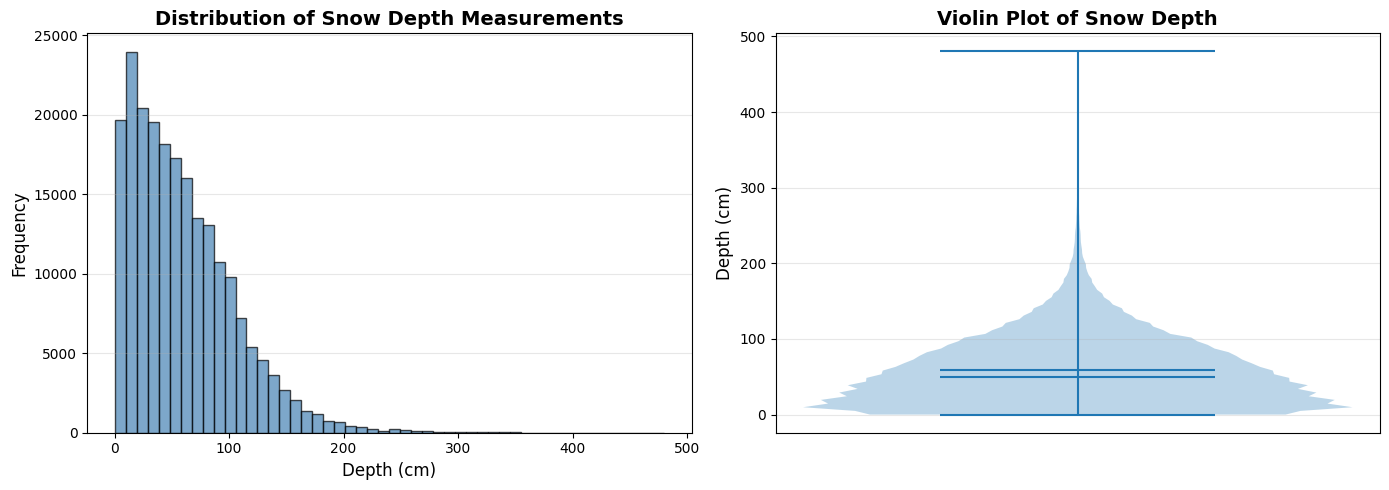

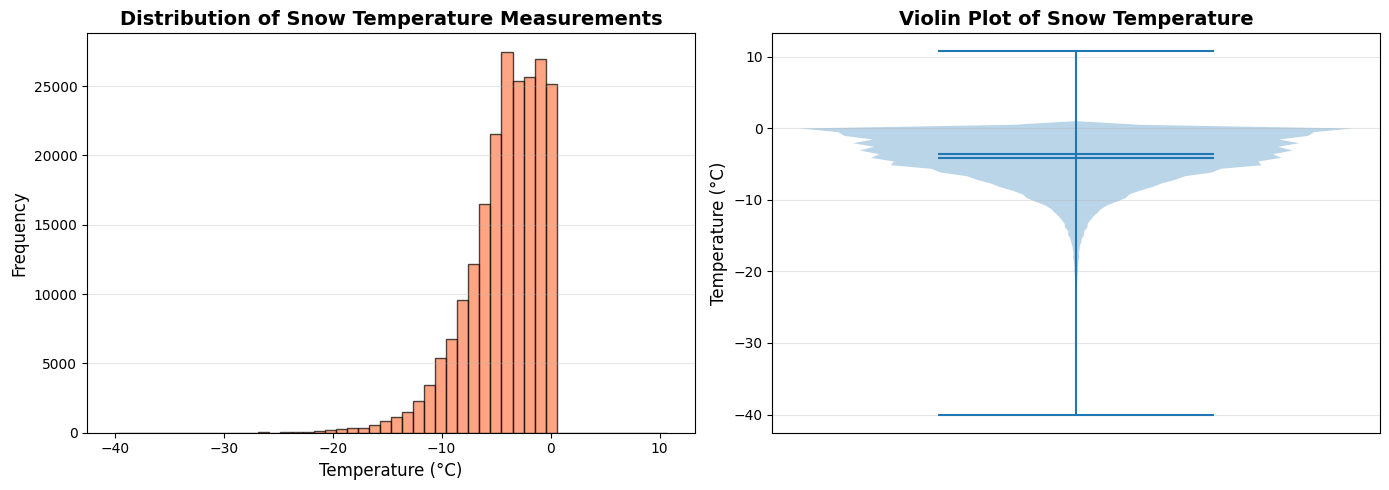

In [54]:
# Summary stats and visualization for temp profile observations

# Filter out any NaN values for analysis
temp_df_clean = temp_df.dropna(subset=['depth_value', 'temp_value'])

# Summary statistics for depth_value
print("Depth Value Summary Statistics")
print("=" * 50)
print(f"Number of observations: {len(temp_df_clean)}")
print(f"Mean: {temp_df_clean['depth_value'].mean():.2f} cm")
print(f"Median: {temp_df_clean['depth_value'].median():.2f} cm")
print(f"Standard Deviation: {temp_df_clean['depth_value'].std():.2f} cm")
print("=" * 50)
print()

# Summary statistics for temp_value
print("Temperature Value Summary Statistics")
print("=" * 50)
print(f"Number of observations: {len(temp_df_clean)}")
print(f"Mean: {temp_df_clean['temp_value'].mean():.2f} °C")
print(f"Median: {temp_df_clean['temp_value'].median():.2f} °C")
print(f"Standard Deviation: {temp_df_clean['temp_value'].std():.2f} °C")
print("=" * 50)
print()
mean_snow_temp = temp_df_clean['temp_value'].mean()

# Create visualizations for depth_value
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for depth
axes[0].hist(temp_df_clean['depth_value'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Depth (cm)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Snow Depth Measurements', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Violin plot for depth
axes[1].violinplot(temp_df_clean['depth_value'], vert=True, showmeans=True, showmedians=True)
axes[1].set_ylabel('Depth (cm)', fontsize=12)
axes[1].set_title('Violin Plot of Snow Depth', fontsize=14, fontweight='bold')
axes[1].set_xticks([])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Create visualizations for temp_value
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram for temperature
axes[0].hist(temp_df_clean['temp_value'], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[0].set_xlabel('Temperature (°C)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Distribution of Snow Temperature Measurements', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Violin plot for temperature
axes[1].violinplot(temp_df_clean['temp_value'], vert=True, showmeans=True, showmedians=True)
axes[1].set_ylabel('Temperature (°C)', fontsize=12)
axes[1].set_title('Violin Plot of Snow Temperature', fontsize=14, fontweight='bold')
axes[1].set_xticks([])
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


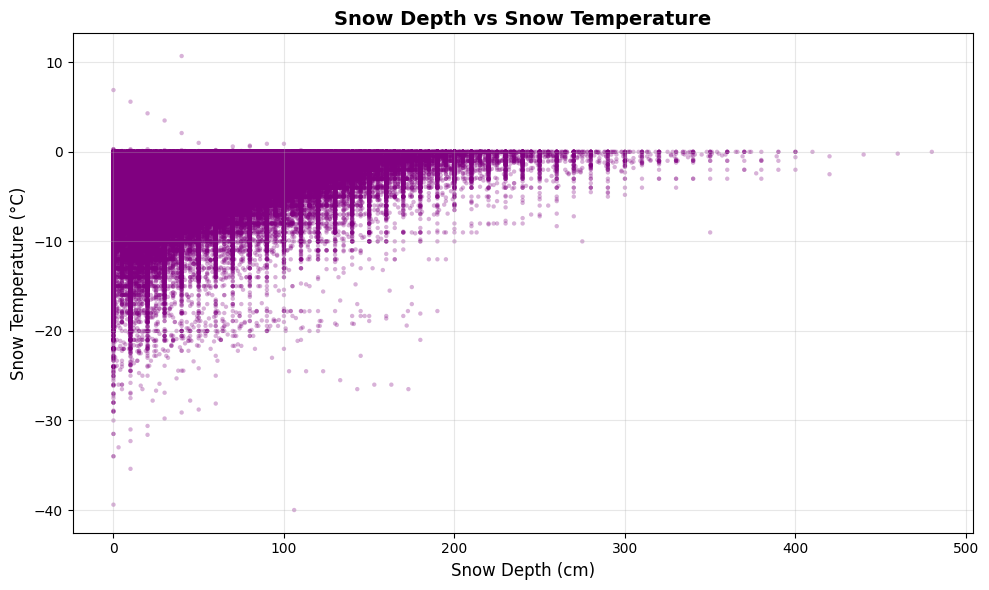

In [52]:

# Scatter plot: Snow Depth vs Snow Temperature
fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(temp_df_clean['depth_value'], temp_df_clean['temp_value'], 
           alpha=0.3, s=10, color='purple', edgecolors='none')
ax.set_xlabel('Snow Depth (cm)', fontsize=12)
ax.set_ylabel('Snow Temperature (°C)', fontsize=12)
ax.set_title('Snow Depth vs Snow Temperature', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
# Emod as a function of temperature

# V(T) = V(T_r)[1 +/- a(T - T_r)]

T_r = -16 # deg C
V_T_r = 8.42 # V(T_r) = 8.42 GPa
a = 1.42 * 10**-3 # K^-1

E_mean_air_temp = V_T_r * (1 + a * (mean_air_temp - T_r)) # Should get more compliant?
E_mean_snow_temp = V_T_r * (1 + a * (mean_snow_temp - T_r))

print(f"E_ref: {V_T_r:.2f} GPa, T_ref: {T_r:.2f} °C")
print(f"E_mean_air_temp: {E_mean_air_temp:.2f} GPa, T_mean_air_temp: {mean_air_temp:.2f} °C")
print(f"E_mean_snow_temp: {E_mean_snow_temp:.2f} GPa, T_mean_snow_temp: {mean_snow_temp:.2f} °C")


E_ref: 8.42 GPa, T_ref: -16.00 °C
E_mean_air_temp: 8.58 GPa, T_mean_air_temp: -2.30 °C
E_mean_snow_temp: 8.56 GPa, T_mean_snow_temp: -4.21 °C


In [62]:
# What temp gives you 10 GPa?

T_10_GPa = T_r + (V_T_r - 10) / (a * V_T_r)
print(f"T_10_GPa: {T_10_GPa:.2f} °C")


T_10_GPa: -148.15 °C
